# 🧪 Diabetes Prediction Project - Part 1: Exploratory Data Analysis (EDA)
Welcome! In this notebook, we'll explore the **Pima Indians Diabetes Dataset** and prepare it for machine learning.

## Import Libraries
We'll begin by importing necessary Python libraries for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load the Dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic Dataset Overview
Let's understand the structure and summary statistics of the dataset.

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Checking for Missing or Zero Values

In [6]:
# In this dataset, some zeros represent missing values (e.g., for glucose or insulin)
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_features:
    print(f'{col} has {(df[col] == 0).sum()} zero values')

Glucose has 5 zero values
BloodPressure has 35 zero values
SkinThickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values


## Data Visualization


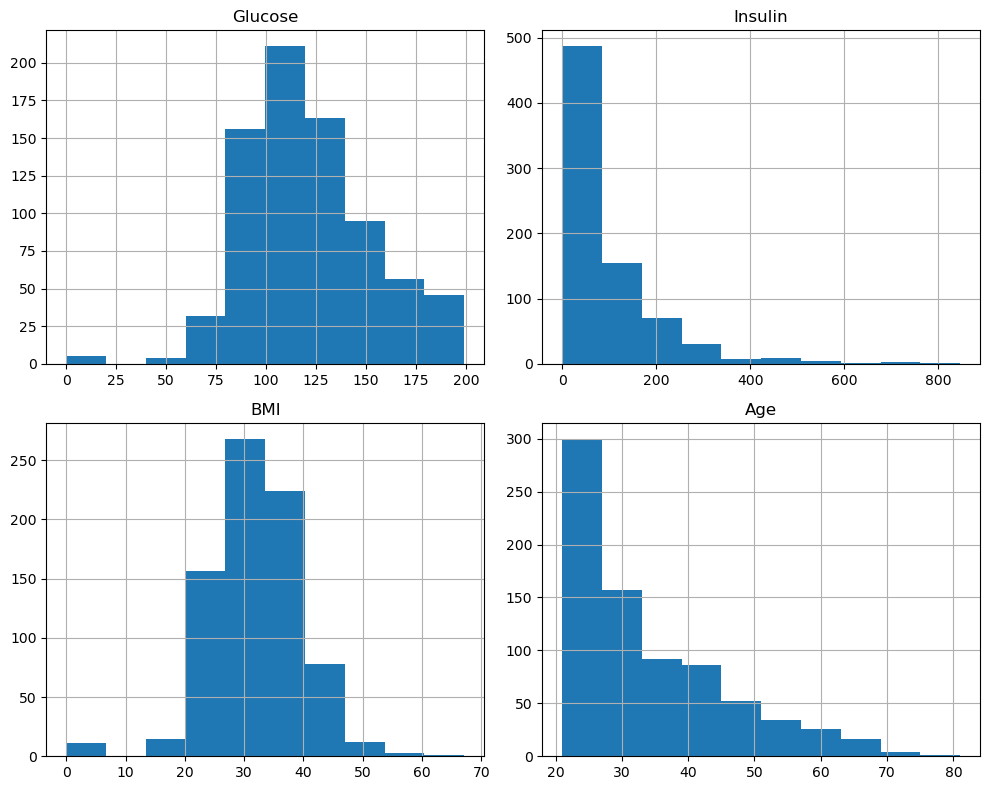

In [7]:
# Distribution of important features
features = ['Glucose', 'Insulin', 'BMI', 'Age']
df[features].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

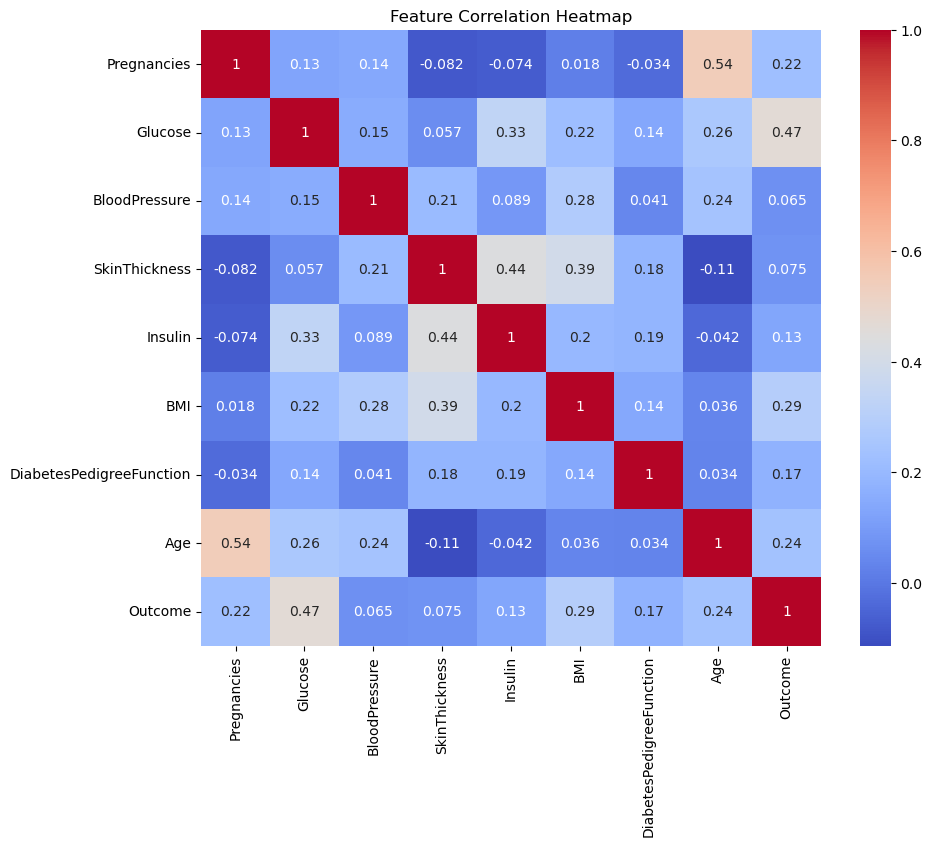

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 🔗 Correlation Heatmap Insights

- **Glucose** is most positively correlated with diabetes (`Outcome`), which supports medical intuition.
- **BMI** and **Age** also show moderate correlation with the target.
- Some features, like **Insulin**, **SkinThickness**, and **BloodPressure**, are weakly correlated.
- **Pregnancies** and **Age** are strongly correlated (0.54), which is expected.

🧠 These insights help in **feature selection** and understanding the **predictive power** of each variable.

➡️ In the next part, we'll build a machine learning model to predict diabetes using this dataset.

# Part 2: Machine Learning - Diabetes Prediction
We'll now train a few machine learning models to predict whether a patient has diabetes.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [11]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



## Confusion Matrices for Model Evaluation

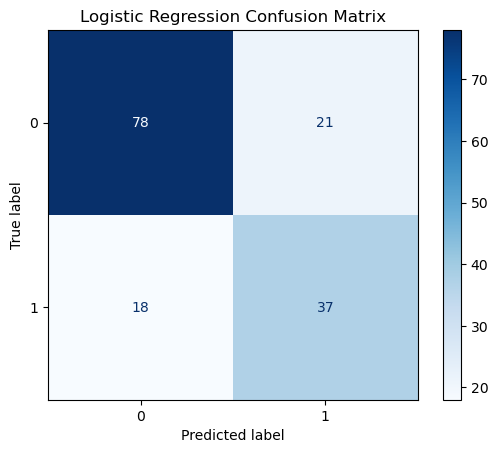

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_reg.classes_)
disp_log.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

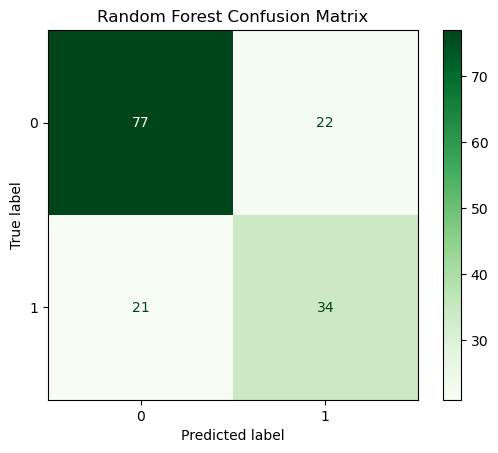

In [13]:
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()


## Model Evaluation Summary

| Metric        | Logistic Regression | Random Forest |
|---------------|---------------------|----------------|
| Accuracy      | 0.75                | 0.72           |
| Precision (1) | 0.64                | 0.61           |
| Recall (1)    | 0.67                | 0.62           |
| F1-score (1)  | 0.65                | 0.61           |

- Logistic Regression performed better overall and identified more diabetic patients (higher recall).
- Random Forest had slightly worse recall, which can be critical in a medical setting.
- Despite being a simpler model, **Logistic Regression is the better choice for this problem** — at least without tuning the Random Forest further.
-Always evaluate models using not just accuracy, but also **precision, recall, and F1-score** — especially in healthcare!


C:\Users\Admin\AppData\Local\Temp\ipykernel_17996\1015836083.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


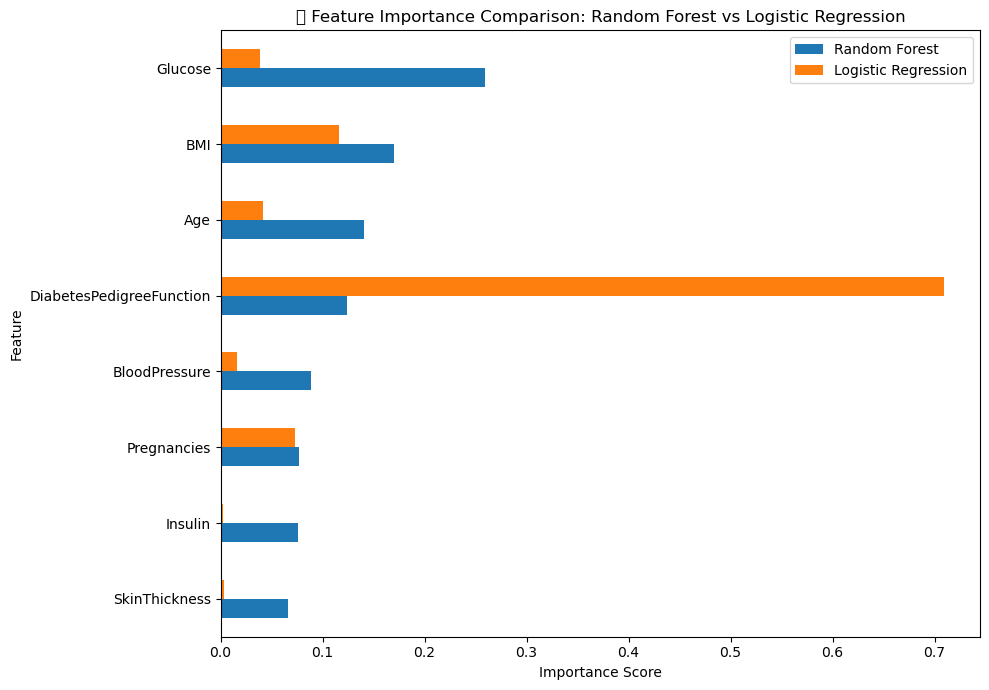

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature names
features = X.columns

# Get importances from Random Forest
rf_importances = rf_clf.feature_importances_

# Get importances (coefficients) from Logistic Regression
# Take absolute value since coefficients can be negative
log_reg_importances = np.abs(log_reg.coef_[0])

# Normalize logistic regression importances (optional, for better comparison)
log_reg_importances = log_reg_importances / sum(log_reg_importances)

# Create DataFrames
importance_df = pd.DataFrame({
    'Feature': features,
    'Random Forest': rf_importances,
    'Logistic Regression': log_reg_importances
}).set_index('Feature')

# Plot
importance_df.sort_values('Random Forest', ascending=True).plot(kind='barh', figsize=(10, 7))
plt.title('📊 Feature Importance Comparison: Random Forest vs Logistic Regression')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


## Feature Importance Comparison: Logistic Regression vs Random Forest

This plot compares feature importance between:
- **Logistic Regression** (🟧): Based on absolute coefficients
- **Random Forest** (🟦): Based on impurity reduction

### Key Insights:
- **Glucose**, **BMI**, and **Age** are top predictors in both models.
- **DiabetesPedigreeFunction** shows strong linear importance but less effect in the Random Forest model.
- **SkinThickness** and **Insulin** have low importance, possibly due to missing or skewed data.

